<a href="https://colab.research.google.com/github/JOSEPHINEGEND/Moringa_Data_Science_Core_W1_Independent_Project_2019_08_Josephine_Wanjiku_Python_Notebook/blob/master/Moringa_Data_Science_Core_W1_Independent_Project_2019_08_Josephine_Wanjiku_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.1  Defining the Question

## 1.1.1 Specifying the question

## 1.1.2 Defining the Metric for Success

## 1.1.3 Understanding the context

## 1.1.4 Recording the Experimental Design

## 1.1.5 Data Relevance

# 1.2 Reading the dataset

In [0]:
# Importing libraries we will use for our analysis

import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

import sklearn as sk

import pandas_profiling as pp

In [0]:
# Loading the dataset
finance = pd.read_csv("http://bit.ly/FinancialDataset")


In [203]:
# viewing the first five entries in the dataset

finance.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [0]:
# # viewing the last five entries in the dataset

finance.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [0]:
# Checking whether each column has an appropriate datatype
#
finance.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [0]:
# checking the dataset information

finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23510 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
Has a Bank account        23488 non-null object
Type of Location          23509 non-null object
Cell Phone Access         23513 non-null object
household_size            23496 non-null float64
Respondent Age            23490 non-null float64
gender_of_respondent      23490 non-null object
The relathip with head    23520 non-null object
marital_status            23492 non-null object
Level of Educuation       23495 non-null object
Type of Job               23494 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [0]:
report = pp.ProfileReport(finance)
report

Number of variables,13
Number of observations,23524
Total Missing (%),0.1%
Total size in memory,2.3 MiB
Average record size in memory,104.0 B
Numeric,3
Categorical,10
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [0]:
# Checking the number of rows and columns

finance.shape

(23524, 13)

In [0]:
# checking the columns

finance.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

# 1.3 Tidying the Datasets

## 1.3.1 Handling messy columns names

In [0]:
# dropping columns we do not need for this analysis

finance = finance.drop(['uniqueid'], axis = 1)


In [0]:
finance.head()

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [0]:
# Renaming the columns: mis-spellings

finance.columns

finance.rename(columns={'the_relathip_with_head':'the_relationship_with_head'}, inplace=True)

finance.rename(columns={'level_of_educuation':'level_of_education'}, inplace=True)


In [0]:
# Removing the spaces and setting all column names to lower case

finance.columns = finance.columns.str.lower().str.replace(" ", "_")

finance.columns


Index(['country', 'year', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relathip_with_head', 'marital_status',
       'level_of_educuation', 'type_of_job'],
      dtype='object')

## 1.3.2 Missing values

In [0]:
# Missing values

# checking the number of missing values by column

finance.isnull().sum()

country                   14
year                       0
has_a_bank_account        36
type_of_location          15
cell_phone_access         11
household_size            28
respondent_age            34
gender_of_respondent      34
the_relathip_with_head     4
marital_status            32
level_of_educuation       29
type_of_job               30
dtype: int64

In [0]:
# Replacing missing values with mode on the columns with categorical data

cols = ['country', 'has_a_bank_account', 'type_of_location','cell_phone_access','gender_of_respondent', 'the_relationship_with_head', 'marital_status','level_of_education', 'type_of_job']


finance[cols]=finance[cols].fillna(finance.mode().iloc[0])


In [0]:
# confirming that all categorical columns have been replaced with the mode 

finance.isnull().sum()

country                        0
year                           0
has_a_bank_account             0
type_of_location               0
cell_phone_access              0
household_size                28
respondent_age                34
gender_of_respondent           0
the_relationship_with_head     0
marital_status                 0
level_of_education             0
type_of_job                    0
dtype: int64

In [0]:
# filling missing values in the numerical columns with mean

col = ['household_size', 'respondent_age']

finance[col] = finance[col].fillna(finance.mean().iloc[0])

In [0]:
# confriming there are no missing values

finance.isnull().sum()

country                       0
year                          0
has_a_bank_account            0
type_of_location              0
cell_phone_access             0
household_size                0
respondent_age                0
gender_of_respondent          0
the_relationship_with_head    0
marital_status                0
level_of_education            0
type_of_job                   0
dtype: int64

## 1.3.3 Outliers

In [0]:
# Checking for outliers using a box plot


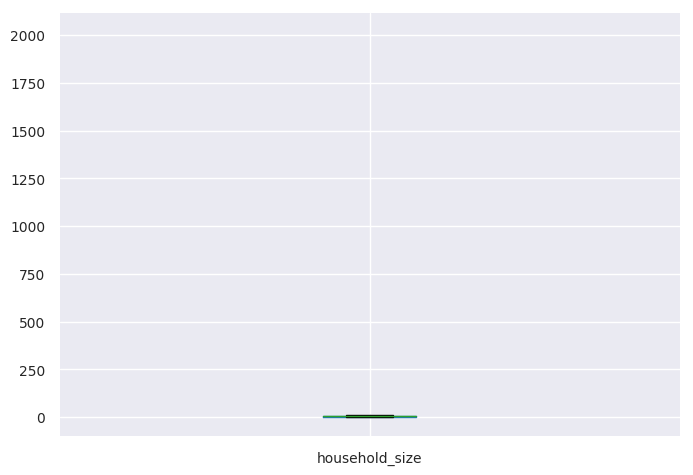

In [0]:
finance.boxplot(['household_size'])


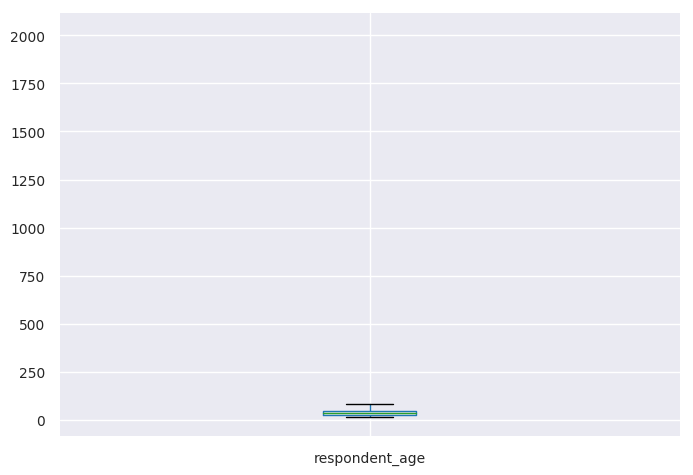

In [0]:
plt.figure(dpi = 100)
finance.boxplot(['respondent_age'])

In [0]:
# Checking for Anomalies
#
print(finance.country.nunique())
print(finance.year.unique())
print('\n')
print(finance.has_a_bank_account.nunique())
print(finance.has_a_bank_account.unique())
print('\n')
print(finance.type_of_location.nunique())
print(finance.type_of_location.unique())
print('\n')
print(finance.cell_phone_access.nunique())
print(finance.cell_phone_access.unique())
print('\n')
print(finance.type_of_location.nunique())
print(finance.type_of_location.unique())
print('\n')
print(finance.gender_of_respondent.nunique())
print(finance.gender_of_respondent.unique())
print('\n')
print(finance.the_relationship_with_head.nunique())
print(finance.the_relationship_with_head.unique())
print('\n')
print(finance.marital_status.nunique())
print(finance.marital_status.unique())
print('\n')
print(finance.level_of_education.nunique())
print(finance.level_of_education.unique())
print('\n')
print(finance.type_of_job.nunique())
print(finance.type_of_job.unique())
print('\n')

# The years columns has three anomalies: 2029,2056,2039
# This will be removed in the code below

In [0]:
# Removing the anomalies on the year column

indexnames = finance[finance['year'] > 2018].index

finance.drop(indexnames, inplace = True)


In [0]:
# checking that there are no anomalies in the year column

finance.year.unique()

array([2018, 2016, 2017])

# 1.4 Exploratory Data Analysis

## 1.4.1 Univariate

### Visualization

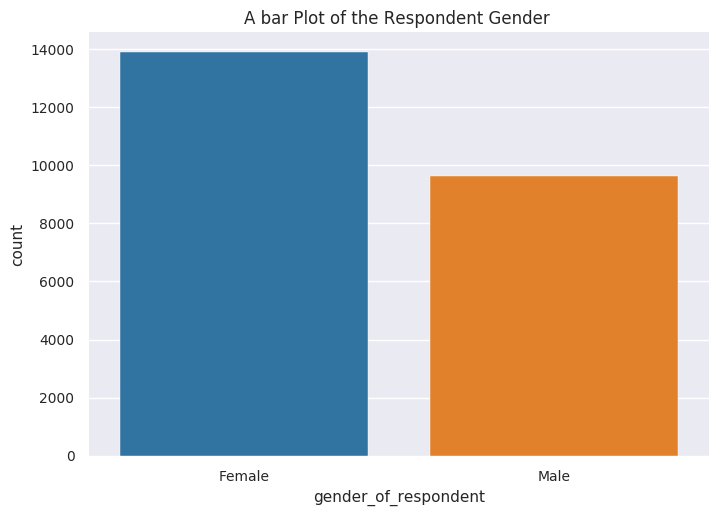

In [0]:
# Plotting a bar plot of the respondent gender 

sns.set_style('darkgrid')
sns.countplot(finance.gender_of_respondent)
plt.title('A bar Plot of the Respondent Gender ')
plt.show()

In [0]:
finance.head()

,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relationship_with_head,marital_status,level_of_education,type_of_job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


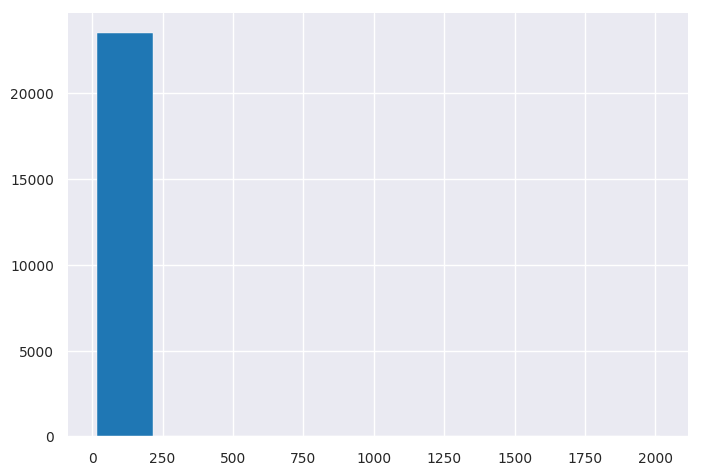

In [0]:
# Histogram of respondent age

finance['respondent_age'].hist()